# Artificial Neural Network

### Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
tf.__version__

'2.5.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [7]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [8]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [10]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [12]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [19]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [20]:
history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5623 - accuracy: 0.7599
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.8036
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8156
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8219
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8255
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8270
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8290
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8290
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8294
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3925 - accura

In [21]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 6)                   78        
_________________________________________________________________
dense_1 (Dense)              (32, 6)                   42        
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [22]:
print(ann.get_weights())

[array([[ 2.95115858e-01, -5.42182386e-01, -4.43073004e-01,
        -5.47277369e-02,  2.23573789e-01,  6.40683830e-01],
       [ 2.53947049e-01, -4.64349389e-01,  4.14704055e-01,
         2.95847595e-01,  5.12300909e-01, -1.13618441e-01],
       [-8.19036961e-01, -1.41624779e-01, -3.85031879e-01,
        -3.83905061e-02,  2.30631113e-01,  5.43584347e-01],
       [ 7.78709585e-03,  2.77806465e-02,  1.50268641e-03,
        -2.06473041e-02,  2.27650795e-02,  3.02717723e-02],
       [ 2.43850127e-02,  7.73331225e-02,  8.83960053e-02,
        -3.67007405e-03,  1.62356734e-01,  2.48247996e-01],
       [-8.35486829e-01, -9.48968410e-01,  4.81600463e-01,
        -3.45037103e-01,  2.61713535e-01, -1.40023734e-02],
       [-1.73738468e-02, -1.89176686e-02, -8.07938203e-02,
        -3.93267721e-02, -3.12476996e-02,  1.89897805e-01],
       [ 4.40740399e-02, -1.71338052e-01, -1.17382132e-01,
        -4.38495755e-01, -4.30509984e-01, -6.46540165e-01],
       [-1.64554939e-01, -6.17963433e-01, -1.40

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [23]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [24]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [25]:
scores = ann.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

63/63 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.8585
Accuracy: 85.85%


### Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1518   77]
 [ 206  199]]


0.8585

# Precision, Recall, F1- Score and Threshold

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.49      0.58       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recall, threshold = precision_recall_curve(y_test,y_pred)

In [29]:
precisions

array([0.2025    , 0.72101449, 1.        ])

In [30]:
recall

array([1.        , 0.49135802, 0.        ])

In [31]:
threshold

array([False,  True])

# Plot the graph

In [32]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


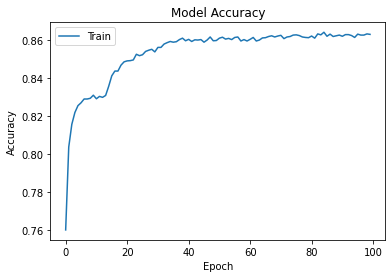

In [35]:
# Plot for Accuracy vs Epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

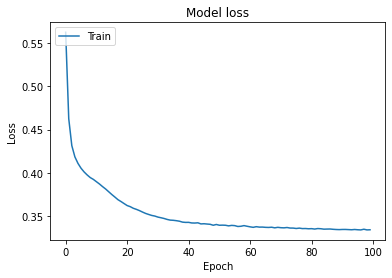

In [36]:
# Plot for Loss vs Epoch
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()